In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely as shp
% matplotlib inline

In [2]:
world = gpd.read_file('countries.json')
us_mainland = gpd.read_file('us_mainland.geojson')
world.loc[world.id == 'USA', 'geometry'] =  us_mainland.geometry.values

<AxesSubplot:>

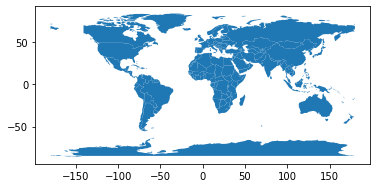

In [3]:
world.plot()

In [4]:
world.head()

,id,name,geometry
0,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
2,ALB,Albania,"POLYGON ((20.59025 41.85540, 20.46317 41.51509..."
3,ARE,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000..."


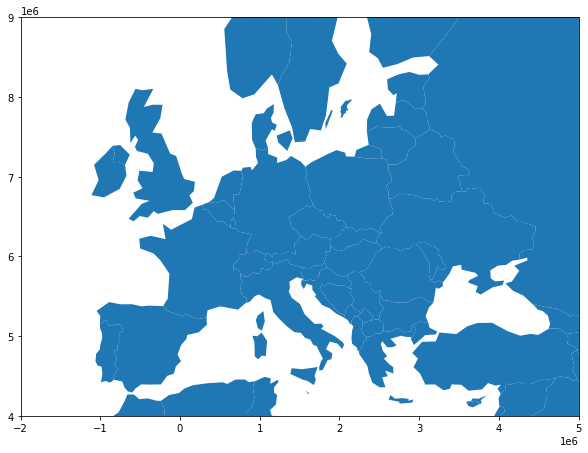

In [5]:
fig, ax = plt.subplots(figsize = (10,10))
world.to_crs(3857).plot(ax=ax)
plt.xlim(-2000000,5000000)
plt.ylim(4000000,9000000)
plt.show()

In [6]:
world.to_crs(3857, inplace = True)

In [7]:
con = ['Italy','Spain','Germany','Ireland','Portugal']
con = world.loc[world.name.isin(con)]
con.geometry = con.geometry.centroid

C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


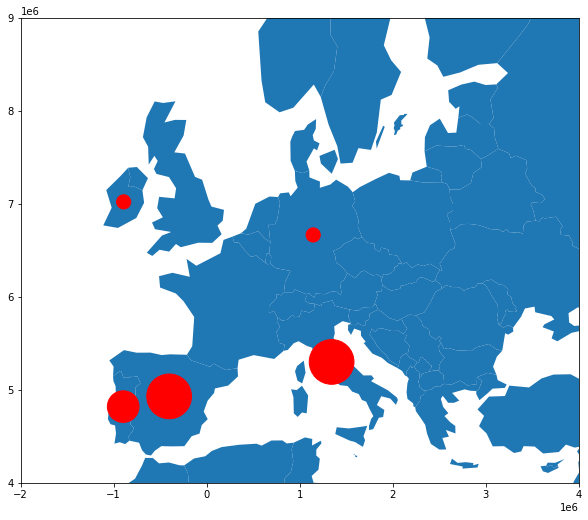

In [8]:
fig, ax = plt.subplots(figsize = (10,10))
world.plot(ax=ax)
con.plot(ax=ax, color = 'r', markersize = [200,2000,200,2000,1000])
plt.xlim(-2000000,4000000)
plt.ylim(4000000,9000000)
plt.show()

In [9]:
import contextily as ctx

In [10]:
lead = world.loc[world.name.isin(con.name)]
lead.head()

,id,name,geometry
42,DEU,Germany,"POLYGON ((1104501.524 7358587.634, 1106468.984..."
50,ESP,Spain,"POLYGON ((-1005751.339 5143106.313, -1000142.5..."
76,IRL,Ireland,"POLYGON ((-689945.402 7145114.481, -671588.818..."
81,ITA,Italy,"MULTIPOLYGON (((1727720.353 4612131.923, 16876..."
133,PRT,Portugal,"POLYGON ((-1005751.339 5143106.313, -965356.61..."


In [11]:
part = 'Belgium, France, Germany, Italy, Poland, Portugal & United Kingdom, Italy, Romania, Spain, United Kingdom & United States of America,Ireland, Netherlands, Spain & Sweden,Austria, France, Germany, Portugal & Romania,Germany, Spain, Italy, Poland & Croatia,Ireland, Belgium, Spain, Croatia & Hungary,Portugal, Italy, Spain & The Nederlands,Spain, Denmark, France, The Netherlands & Austria, Austria, Croatia, Germany, Italy, Lithuania, Netherlands, Portugal & Spain, Germany, Sweden & Netherlands'
part = part.replace(' & ',',').replace(', ',',').split(',')

In [12]:
partners = world.loc[(world.name.isin(part))]
partners

,id,name,geometry
9,AUT,Austria,"POLYGON ((1890167.884 6127424.982, 1881717.288..."
12,BEL,Belgium,"POLYGON ((369020.884 6682687.810, 450517.883 6..."
42,DEU,Germany,"POLYGON ((1104501.524 7358587.634, 1106468.984..."
44,DNK,Denmark,"MULTIPOLYGON (((1412645.006 7481164.446, 13458..."
50,ESP,Spain,"POLYGON ((-1005751.339 5143106.313, -1000142.5..."
56,FRA,France,"MULTIPOLYGON (((1064216.113 5183849.447, 10274..."
58,GBR,United Kingdom,"MULTIPOLYGON (((-630285.280 7275899.095, -6899..."
71,HRV,Croatia,"POLYGON ((2096127.978 5765758.861, 2123170.933..."
73,HUN,Hungary,"POLYGON ((1803631.563 5918012.907, 1840586.294..."
76,IRL,Ireland,"POLYGON ((-689945.402 7145114.481, -671588.818..."


In [13]:
lead_p = lead.copy()
lead_p.geometry = lead_p.geometry.centroid
partners_p = partners.copy()
partners_p.geometry = partners_p.geometry.centroid

In [14]:
world.loc[world.id == 'USA', 'geometry']

170    POLYGON ((-10555044.724 6341134.726, -10535276...
Name: geometry, dtype: geometry

In [15]:
import numpy as np
import sympy as sm

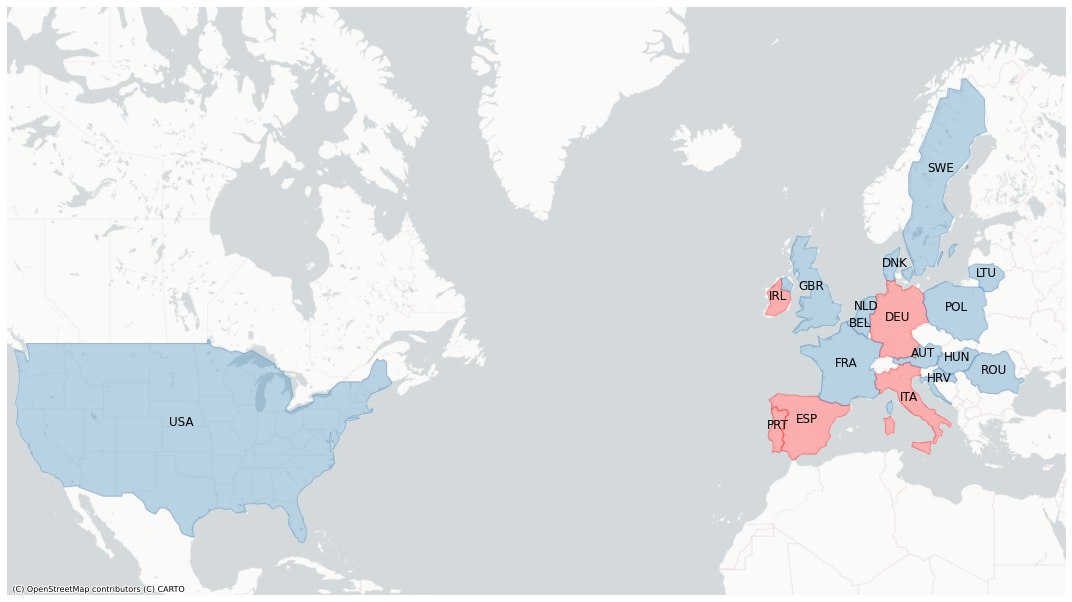

In [22]:
fig, ax = plt.subplots(figsize = (15,15))
world.plot(ax=ax, color = 'None', edgecolor = 'k', linestyle = '--',
          alpha = 0.0)
lead.plot(ax=ax, color = 'r',
          alpha = 0.3,
          edgecolor = 'r')

partners_not = partners.loc[np.logical_not(partners.name.isin(lead.name)),:].copy()
partners_not.plot(ax=ax,edgecolor = '#1f77b4',
          alpha = 0.3)

for i in range(len(partners_not)):
    plt.annotate(text = partners_not.reset_index().iloc[i, 1],
                 xy = (partners_not.reset_index().iloc[i, -1].centroid.x,
                       partners_not.reset_index().iloc[i, -1].centroid.y),
                 size = 12, ha = 'center')

for i in range(len(lead)):
    plt.annotate(text = lead.reset_index().iloc[i, 1],
                 xy = (lead.reset_index().iloc[i, -1].centroid.x, lead.reset_index().iloc[i, -1].centroid.y),
                size = 12, ha = 'center')

plt.xlim(-14000000,4000000)
plt.ylim(2000000,12000000)



ctx.add_basemap(ax, source = ctx.providers.CartoDB.PositronNoLabels)
ax.axis('off')
plt.tight_layout()

plt.savefig('map_lead_with_us.pdf')

In [17]:
countries = {'Spain':'Ireland,Sweden,Denmark,France,Netherlands,Austria',
             'Italy':'Belgium,France,Germany,Poland,Portugal,United Kingdom,Romania,Croatia,United States of America',
             'Germany':'Austria,France,Portugal,Romania,Sweden,Netherlands',
             'Ireland':'Belgium,Spain,Croatia,Hungary',
             'Portugal':' Italy,Spain,Netherlands,Austria,Croatia,Germany,Lithuania'}

for c in range(5):
    country = list(countries)[c]
    country_df = lead_p[lead_p.name == country]
    globals()['p'+country] = countries[country]
    globals()['p'+country] = globals()['p'+country].split(',')
    globals()['p'+country]
    globals()['p'+country] = world.loc[world.name.isin(globals()['p'+country])].copy()
    globals()['p'+country].geometry = globals()['p'+country].geometry.centroid


    fig, ax = plt.subplots(figsize = (15,15))
    world.plot(ax=ax, color = 'None', edgecolor = 'k', linestyle = '--',
              alpha = 0.0)
    country_df.plot(ax=ax, color = 'r', markersize = 500,
            alpha = 0.5, edgecolor = 'r', zorder = 1)
    globals()['p'+country].plot(ax=ax, color = '#1f77b4', markersize = 500,
            alpha = 0.8, edgecolor = '#1f77b4', zorder = 1)

    for i in range(len(globals()['p'+country])):
        x1, y1 = country_df.iloc[0,-1].x, country_df.iloc[0,-1].y
        x3, y3 = globals()['p'+country].iloc[i,-1].x, globals()['p'+country].iloc[i,-1].y
        if x1 < x3:
            x2 = x1+ (x3-x1)/6
        else:
            x2 = x1- (x1-x3)/6
        if y1 < y3:
            y2 = y1+ (y3-y1)/2
        else:
            y2 = y1+ (y1-y3)/2

        x = np.array([x1,x2,x3])
        y = np.array([y1,y2,y3])

        a,b,c = sm.symbols('a,b,c', real = True)
        for n in range(3):
            globals()['eq'+str(n+1)] = sm.Eq((np.power(x[n],2))*a + (x[n])*b +c , y[n])
        sol = sm.solve([eq1,eq2,eq3], (a,b,c))
        def f(x):
            return sol[a]*(np.power(x,2)) + sol[b]*x + sol[c]

        plt.plot(np.linspace(x[0],x[-1],50), f(np.linspace(x[0],x[-1],50)),
                color = 'grey', linewidth = 1, zorder = -3)

    plt.annotate(text = country_df.reset_index().iloc[0,1],
                xy = (country_df.reset_index().iloc[0,-1].x,
                     country_df.reset_index().iloc[0,-1].y-200000),
                size = 14, ha = 'center', va = 'top')
    for i in range(len(globals()['p'+country])):
        plt.annotate(text = globals()['p'+country].reset_index().iloc[i,1],
                     xy =(globals()['p'+country].reset_index().iloc[i,-1].x,
                          globals()['p'+country].reset_index().iloc[i,-1].y-200000),
                     size =14, ha = 'center', va = 'top')

    plt.xlim(-14000000,4000000)
    plt.ylim(2000000,12000000)

    ctx.add_basemap(ax, source = ctx.providers.CartoDB.PositronNoLabels, zorder = -4)
    ax.axis('off')
    plt.tight_layout()
    plt.savefig('map_connections'+country+'.jpg', dpi = 300)

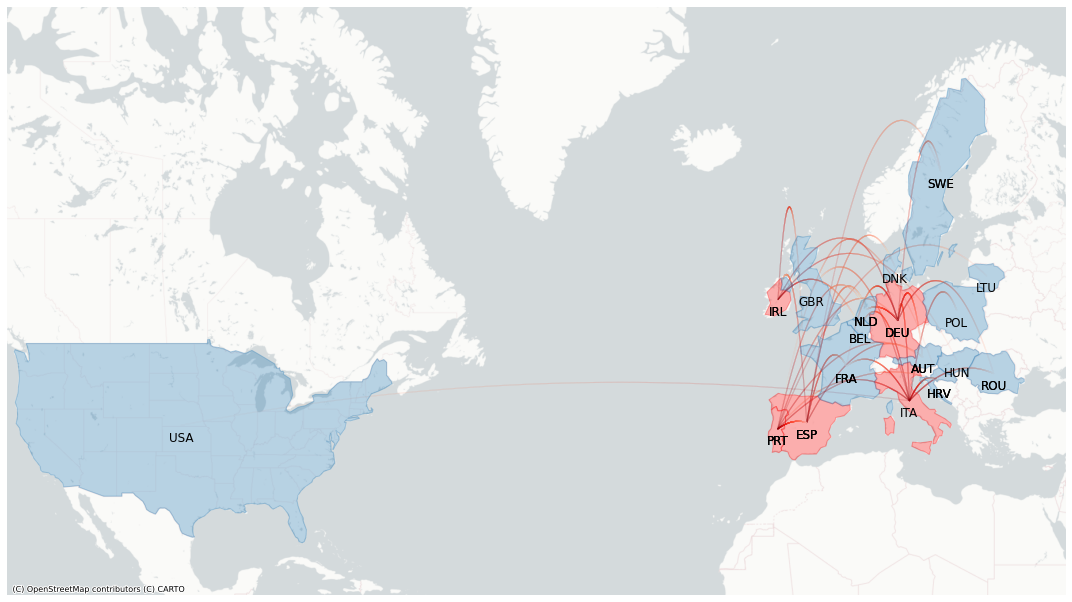

In [18]:
fig, ax = plt.subplots(figsize = (15,15))

lead.plot(ax=ax, color = 'r',
          alpha = 0.3,
          edgecolor = 'r')

partners_not = partners.loc[np.logical_not(partners.name.isin(lead.name)),:].copy()
partners_not.plot(ax=ax,edgecolor = '#1f77b4',
          alpha = 0.3)


for c in range(5):
    country = list(countries)[c]
    country_df = lead_p[lead_p.name == country]
    globals()['p'+country] = countries[country]
    globals()['p'+country] = globals()['p'+country].split(',')
    globals()['p'+country]
    globals()['p'+country] = world.loc[world.name.isin(globals()['p'+country])].copy()
    globals()['p'+country].geometry = globals()['p'+country].geometry.centroid

    for i in range(len(globals()['p'+country])):
        x1, y1 = country_df.iloc[0,-1].x, country_df.iloc[0,-1].y
        x3, y3 = globals()['p'+country].iloc[i,-1].x, globals()['p'+country].iloc[i,-1].y
        if x1 < x3:
            x2 = x1+ (x3-x1)/6
        else:
            x2 = x1- (x1-x3)/6
        if y1 < y3:
            y2 = y1+ (y3-y1)/2
        else:
            y2 = y1+ (y1-y3)/2

        x = np.array([x1,x2,x3])
        y = np.array([y1,y2,y3])

        a,b,c = sm.symbols('a,b,c', real = True)
        for n in range(3):
            globals()['eq'+str(n+1)] = sm.Eq((np.power(x[n],2))*a + (x[n])*b +c , y[n])
        sol = sm.solve([eq1,eq2,eq3], (a,b,c))
        def f(x):
            return sol[a]*(np.power(x,2)) + sol[b]*x + sol[c]

        col = np.tan(np.linspace(-1, 1, 1500))
        plt.scatter(np.linspace(x[0],x[-1],1500), f(np.linspace(x[0],x[-1],1500)),
                    c = col, zorder = -3, cmap= 'Reds_r', s = 0.005, alpha = 0.4)

    plt.annotate(text = country_df.reset_index().iloc[0,1],
                xy = (country_df.reset_index().iloc[0,-1].x,
                     country_df.reset_index().iloc[0,-1].y-100000),
                size = 12, ha = 'center', va = 'top')
    for i in range(len(globals()['p'+country])):
        plt.annotate(text = globals()['p'+country].reset_index().iloc[i,1],
                     xy =(globals()['p'+country].reset_index().iloc[i,-1].x,
                          globals()['p'+country].reset_index().iloc[i,-1].y-100000),
                     size =12, ha = 'center', va = 'top')


plt.xlim(-14000000,4000000)
plt.ylim(2000000,12000000)

ctx.add_basemap(ax, source = ctx.providers.CartoDB.PositronNoLabels, zorder = -4)
ax.axis('off')
plt.tight_layout()
plt.savefig('map_connections_all_gradiant_r_with_us.pdf')

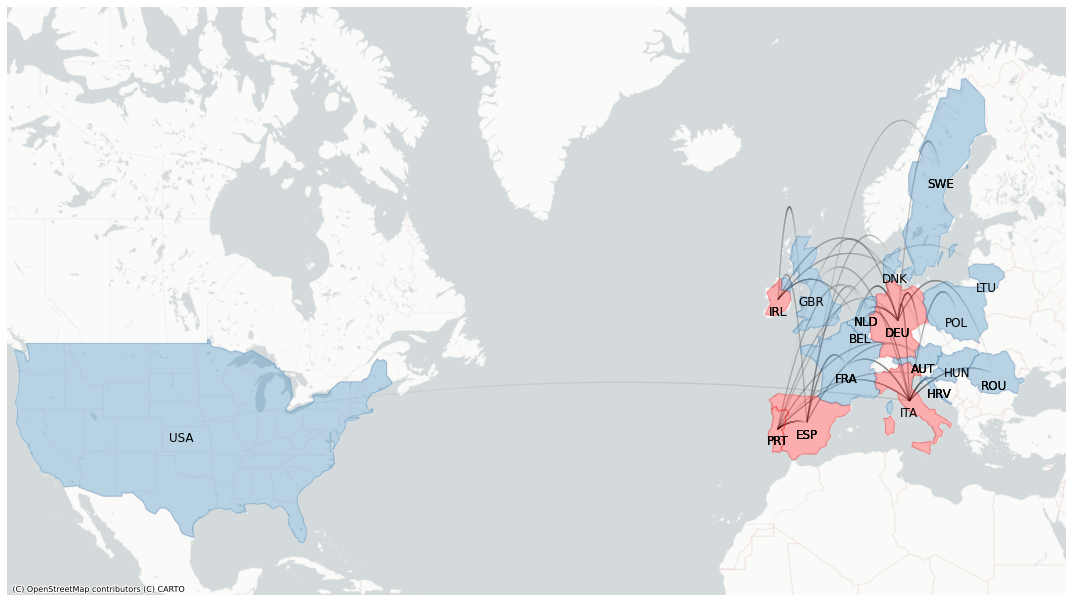

In [19]:
fig, ax = plt.subplots(figsize = (15,15))

lead.plot(ax=ax, color = 'r',
          alpha = 0.3,
          edgecolor = 'r')

partners_not = partners.loc[np.logical_not(partners.name.isin(lead.name)),:].copy()
partners_not.plot(ax=ax,edgecolor = '#1f77b4',
          alpha = 0.3)


for c in range(5):
    country = list(countries)[c]
    country_df = lead_p[lead_p.name == country]
    globals()['p'+country] = countries[country]
    globals()['p'+country] = globals()['p'+country].split(',')
    globals()['p'+country]
    globals()['p'+country] = world.loc[world.name.isin(globals()['p'+country])].copy()
    globals()['p'+country].geometry = globals()['p'+country].geometry.centroid

    for i in range(len(globals()['p'+country])):
        x1, y1 = country_df.iloc[0,-1].x, country_df.iloc[0,-1].y
        x3, y3 = globals()['p'+country].iloc[i,-1].x, globals()['p'+country].iloc[i,-1].y
        if x1 < x3:
            x2 = x1+ (x3-x1)/6
        else:
            x2 = x1- (x1-x3)/6
        if y1 < y3:
            y2 = y1+ (y3-y1)/2
        else:
            y2 = y1+ (y1-y3)/2

        x = np.array([x1,x2,x3])
        y = np.array([y1,y2,y3])

        a,b,c = sm.symbols('a,b,c', real = True)
        for n in range(3):
            globals()['eq'+str(n+1)] = sm.Eq((np.power(x[n],2))*a + (x[n])*b +c , y[n])
        sol = sm.solve([eq1,eq2,eq3], (a,b,c))
        def f(x):
            return sol[a]*(np.power(x,2)) + sol[b]*x + sol[c]

        col = np.tan(np.linspace(-1, 1, 1500))
        plt.scatter(np.linspace(x[0],x[-1],1500), f(np.linspace(x[0],x[-1],1500)),
                    c = col, zorder = -3, cmap= 'gray', s = 0.005, alpha = 0.4)

    plt.annotate(text = country_df.reset_index().iloc[0,1],
                xy = (country_df.reset_index().iloc[0,-1].x,
                     country_df.reset_index().iloc[0,-1].y-100000),
                size = 12, ha = 'center', va = 'top')
    for i in range(len(globals()['p'+country])):
        plt.annotate(text = globals()['p'+country].reset_index().iloc[i,1],
                     xy =(globals()['p'+country].reset_index().iloc[i,-1].x,
                          globals()['p'+country].reset_index().iloc[i,-1].y-100000),
                     size =12, ha = 'center', va = 'top')


plt.xlim(-14000000,4000000)
plt.ylim(2000000,12000000)

ctx.add_basemap(ax, source = ctx.providers.CartoDB.PositronNoLabels, zorder = -4)
ax.axis('off')
plt.tight_layout()
plt.savefig('map_connections_all_gradiant_k_with_us.pdf')

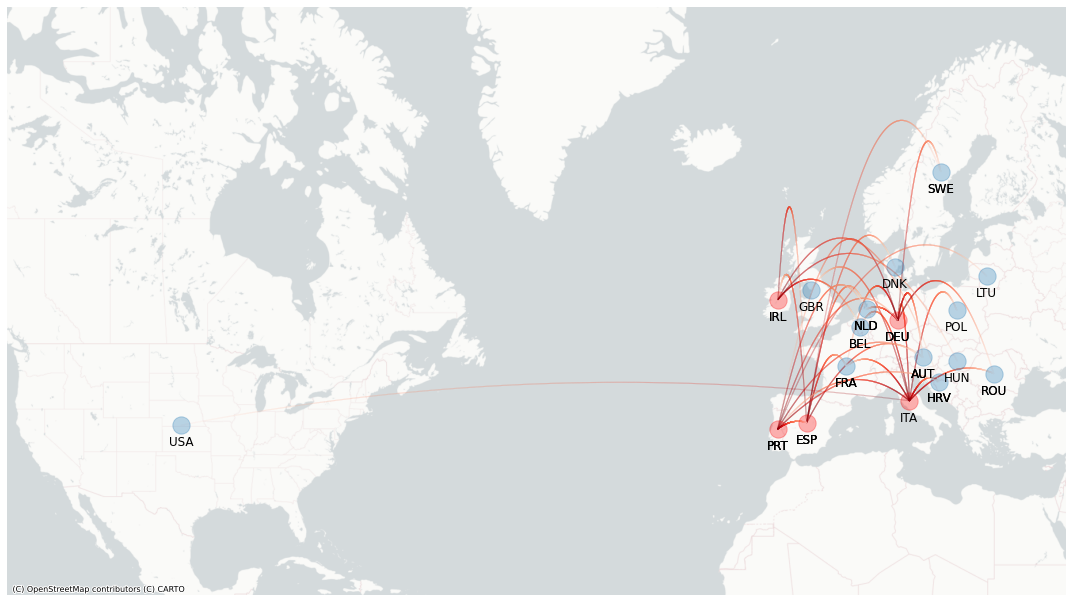

In [20]:
fig, ax = plt.subplots(figsize = (15,15))

lead_p.plot(ax=ax, color = 'r',markersize = 300,
          alpha = 0.3,
          edgecolor = 'r')
partners_not = partners.loc[np.logical_not(partners.name.isin(lead.name)),:].copy()
pn = partners_not.copy()
pn.geometry = pn.geometry.centroid
pn.plot(ax=ax, markersize = 300,
        edgecolor = '#1f77b4',
        alpha = 0.3)


for c in range(5):
    country = list(countries)[c]
    country_df = lead_p[lead_p.name == country]
    globals()['p'+country] = countries[country]
    globals()['p'+country] = globals()['p'+country].split(',')
    globals()['p'+country]
    globals()['p'+country] = world.loc[world.name.isin(globals()['p'+country])].copy()
    globals()['p'+country].geometry = globals()['p'+country].geometry.centroid

    for i in range(len(globals()['p'+country])):
        x1, y1 = country_df.iloc[0,-1].x, country_df.iloc[0,-1].y
        x3, y3 = globals()['p'+country].iloc[i,-1].x, globals()['p'+country].iloc[i,-1].y
        if x1 < x3:
            x2 = x1+ (x3-x1)/6
        else:
            x2 = x1- (x1-x3)/6
        if y1 < y3:
            y2 = y1+ (y3-y1)/2
        else:
            y2 = y1+ (y1-y3)/2

        x = np.array([x1,x2,x3])
        y = np.array([y1,y2,y3])

        a,b,c = sm.symbols('a,b,c', real = True)
        for n in range(3):
            globals()['eq'+str(n+1)] = sm.Eq((np.power(x[n],2))*a + (x[n])*b +c , y[n])
        sol = sm.solve([eq1,eq2,eq3], (a,b,c))
        def f(x):
            return sol[a]*(np.power(x,2)) + sol[b]*x + sol[c]

        col = np.tan(np.linspace(-1, 1, 1500))
        plt.scatter(np.linspace(x[0],x[-1],1500), f(np.linspace(x[0],x[-1],1500)),
                    c = col, zorder = -3, cmap= 'Reds_r', s = 0.005, alpha = 0.7)

    plt.annotate(text = country_df.reset_index().iloc[0,1],
                xy = (country_df.reset_index().iloc[0,-1].x,
                     country_df.reset_index().iloc[0,-1].y-180000),
                size = 12, ha = 'center', va = 'top', zorder = 5)
    for i in range(len(globals()['p'+country])):
        plt.annotate(text = globals()['p'+country].reset_index().iloc[i,1],
                     xy =(globals()['p'+country].reset_index().iloc[i,-1].x,
                          globals()['p'+country].reset_index().iloc[i,-1].y-180000),
                     size =12, ha = 'center', va = 'top', zorder = 5)


plt.xlim(-14000000,4000000)
plt.ylim(2000000,12000000)

ctx.add_basemap(ax, source = ctx.providers.CartoDB.PositronNoLabels, zorder = -4)
ax.axis('off')
plt.tight_layout()
plt.savefig('map_connections_all_gradiant_dot_with_us.pdf')

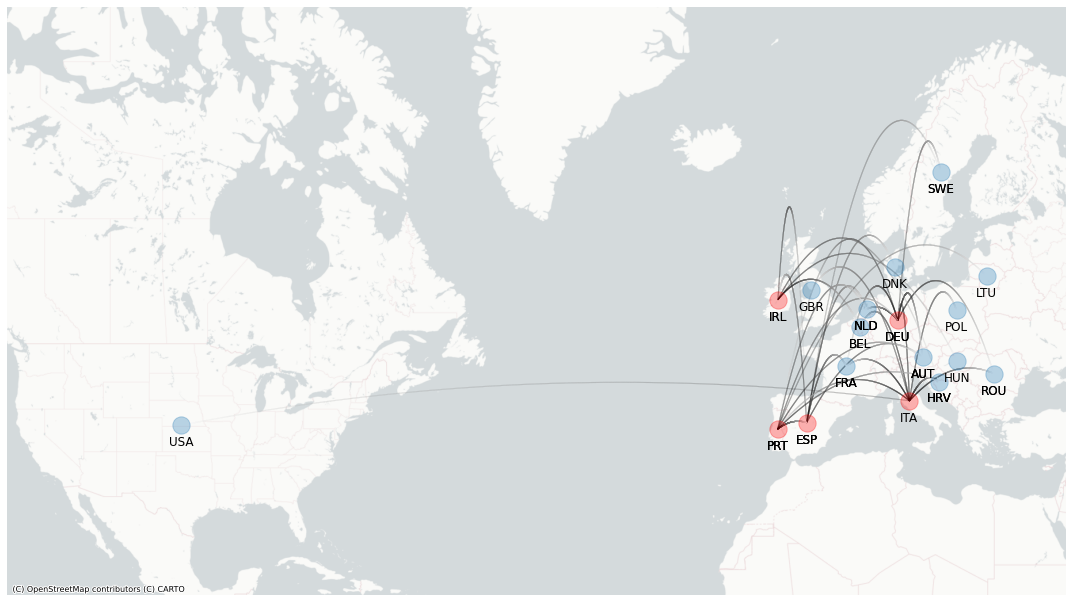

In [21]:
fig, ax = plt.subplots(figsize = (15,15))

lead_p.plot(ax=ax, color = 'r',markersize = 300,
          alpha = 0.3,
          edgecolor = 'r')
partners_not = partners.loc[np.logical_not(partners.name.isin(lead.name)),:].copy()
pn = partners_not.copy()
pn.geometry = pn.geometry.centroid
pn.plot(ax=ax, markersize = 300,
        edgecolor = '#1f77b4',
        alpha = 0.3)


for c in range(5):
    country = list(countries)[c]
    country_df = lead_p[lead_p.name == country]
    globals()['p'+country] = countries[country]
    globals()['p'+country] = globals()['p'+country].split(',')
    globals()['p'+country]
    globals()['p'+country] = world.loc[world.name.isin(globals()['p'+country])].copy()
    globals()['p'+country].geometry = globals()['p'+country].geometry.centroid

    for i in range(len(globals()['p'+country])):
        x1, y1 = country_df.iloc[0,-1].x, country_df.iloc[0,-1].y
        x3, y3 = globals()['p'+country].iloc[i,-1].x, globals()['p'+country].iloc[i,-1].y
        if x1 < x3:
            x2 = x1+ (x3-x1)/6
        else:
            x2 = x1- (x1-x3)/6
        if y1 < y3:
            y2 = y1+ (y3-y1)/2
        else:
            y2 = y1+ (y1-y3)/2

        x = np.array([x1,x2,x3])
        y = np.array([y1,y2,y3])

        a,b,c = sm.symbols('a,b,c', real = True)
        for n in range(3):
            globals()['eq'+str(n+1)] = sm.Eq((np.power(x[n],2))*a + (x[n])*b +c , y[n])
        sol = sm.solve([eq1,eq2,eq3], (a,b,c))
        def f(x):
            return sol[a]*(np.power(x,2)) + sol[b]*x + sol[c]

        col = np.tan(np.linspace(-1, 1, 1500))
        plt.scatter(np.linspace(x[0],x[-1],1500), f(np.linspace(x[0],x[-1],1500)),
                    c = col, zorder = -3, cmap= 'gray', s = 0.005, alpha = 0.7)

    plt.annotate(text = country_df.reset_index().iloc[0,1],
                xy = (country_df.reset_index().iloc[0,-1].x,
                     country_df.reset_index().iloc[0,-1].y-180000),
                size = 12, ha = 'center', va = 'top', zorder = 5)
    for i in range(len(globals()['p'+country])):
        plt.annotate(text = globals()['p'+country].reset_index().iloc[i,1],
                     xy =(globals()['p'+country].reset_index().iloc[i,-1].x,
                          globals()['p'+country].reset_index().iloc[i,-1].y-180000),
                     size =12, ha = 'center', va = 'top', zorder = 5)


plt.xlim(-14000000,4000000)
plt.ylim(2000000,12000000)

ctx.add_basemap(ax, source = ctx.providers.CartoDB.PositronNoLabels, zorder = -4)
ax.axis('off')
plt.tight_layout()
plt.savefig('map_connections_all_gradiant_dot_k_with_us.pdf')